In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Generate random data (for demonstration purposes)
np.random.seed(42)
data = np.random.rand(100, 5)  # 100 samples, 5 features

# Convert to DataFrame for better visualization
df = pd.DataFrame(data, columns=[f'Feature_{i+1}' for i in range(5)])

In [3]:
# Step 3: Preprocessing - Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [4]:
# Step 4: Train-Test Split
X_train, X_test = train_test_split(scaled_data, test_size=0.3, random_state=42)

In [5]:
# Step 5: Train Base Model (K-Means Clustering)
# Let's choose K=3 for simplicity, but in practice, we'd use the Elbow method or Silhouette Score to select K.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [6]:
# Step 6: Evaluate the model - Silhouette Score
train_silhouette_score = silhouette_score(X_train, kmeans.labels_)
print(f"Silhouette Score for Training Data: {train_silhouette_score:.3f}")

Silhouette Score for Training Data: 0.146


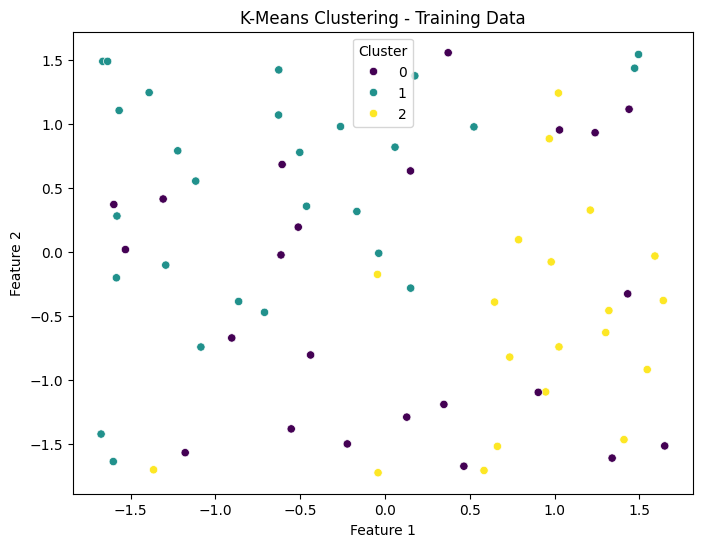

In [7]:
# Step 7: Visualize Clusters (Optional)
# Visualizing the first two features for simplicity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('K-Means Clustering - Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title="Cluster")
plt.show()

In [8]:
# Step 8: Predict New Data (Assign clusters to test set)
test_labels = kmeans.predict(X_test)

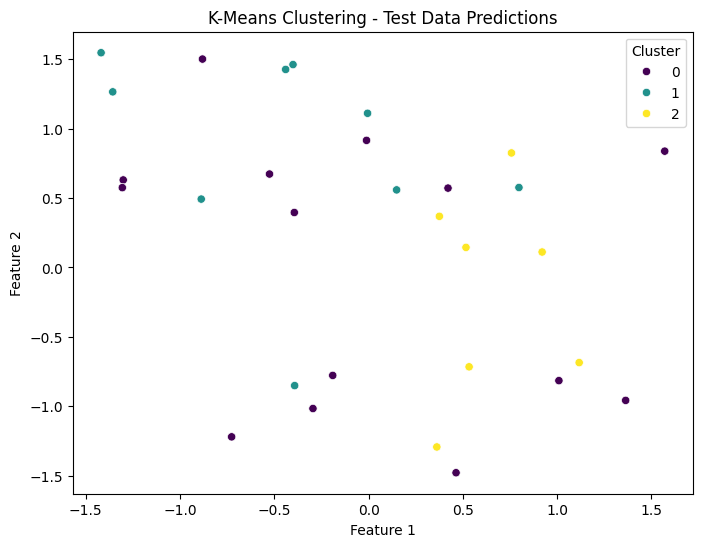

In [9]:
# Visualizing the test predictions (using the first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=test_labels, palette='viridis')
plt.title('K-Means Clustering - Test Data Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title="Cluster")
plt.show()